## HPC Lab-2  
Name: Tanvi Penumudy

Enroll No: E18CSE187

In [1]:
import multiprocessing
import os
import time
import numpy
import itertools 

#### 1. Prime in a Power Set

In [3]:
def isprime(num):
  if(num>1):
   for i in range(2,num):
       if(num%i)==0:
           return False
   else:
           return True
  else:
      return False

In [4]:
isprime(31)

True

In [5]:
def findpowerset(s): 
    lst = []
    for i in range(1, len(s)+1):
      lst.append(list(itertools.combinations(s, i)))
    return lst

def printprime(lst):
  primes = []
  for i in lst:
    for j in i:
      if(isprime(sum(list(j)))):
        primes.append(j)
  return primes 

In [8]:
arr = []
for i in range(1,11):
  arr.append(i)
print(arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [11]:
# Serial
%%time
lst = findpowerset(arr)
print(printprime(lst))
print(len(printprime(lst)))

[(2,), (3,), (5,), (7,), (1, 2), (1, 4), (1, 6), (1, 10), (2, 3), (2, 5), (2, 9), (3, 4), (3, 8), (3, 10), (4, 7), (4, 9), (5, 6), (5, 8), (6, 7), (7, 10), (8, 9), (9, 10), (1, 2, 4), (1, 2, 8), (1, 2, 10), (1, 3, 7), (1, 3, 9), (1, 4, 6), (1, 4, 8), (1, 5, 7), (1, 6, 10), (1, 7, 9), (1, 8, 10), (2, 3, 6), (2, 3, 8), (2, 4, 5), (2, 4, 7), (2, 5, 6), (2, 5, 10), (2, 6, 9), (2, 7, 8), (2, 7, 10), (2, 8, 9), (3, 4, 6), (3, 4, 10), (3, 5, 9), (3, 6, 8), (3, 6, 10), (3, 7, 9), (4, 5, 8), (4, 5, 10), (4, 6, 7), (4, 6, 9), (4, 7, 8), (4, 9, 10), (5, 6, 8), (5, 8, 10), (6, 7, 10), (6, 8, 9), (1, 2, 3, 5), (1, 2, 3, 7), (1, 2, 4, 6), (1, 2, 4, 10), (1, 2, 5, 9), (1, 2, 6, 8), (1, 2, 6, 10), (1, 2, 7, 9), (1, 3, 4, 5), (1, 3, 4, 9), (1, 3, 5, 8), (1, 3, 5, 10), (1, 3, 6, 7), (1, 3, 6, 9), (1, 3, 7, 8), (1, 3, 9, 10), (1, 4, 5, 7), (1, 4, 5, 9), (1, 4, 6, 8), (1, 4, 8, 10), (1, 5, 6, 7), (1, 5, 7, 10), (1, 5, 8, 9), (1, 6, 7, 9), (2, 3, 4, 8), (2, 3, 4, 10), (2, 3, 5, 7), (2, 3, 5, 9), (2, 3, 6, 

In [12]:
count = 0
count2 = 0
for i in lst:
    count2+=1
    for j in i:
      count+=1

In [13]:
print(count)
print(count2)

1023
10


In [14]:
l = count//2

In [15]:
list1 = []
list2 = []
count = 0
for i in lst:
    for j in i:
      count=count+1
      if(count<=l):
        list1.append(j)
      else:
        list2.append(j)

In [16]:
print(len(list1))
print(len(list2))

511
512


In [17]:
def printprime1(lst):
  primes = []
  for i in lst:
    if(isprime(sum(list(i)))):
      primes.append(i)
  return primes 
printprime1([(1,),(1,2),(3,2)])

[(1, 2), (3, 2)]

In [18]:
# Parallel
%%time
def worker1(lst): 
  return printprime1(lst)

def worker2(lst): 
  return printprime1(lst)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  print(worker1(list1))
  print(len(worker1(list1)))
  print(worker2(list2))
  print(len(worker2(list2)))
  print("Done!") 

Process Process-1:
Traceback (most recent call last):
Process Process-2:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 1 required positional argument: 'lst'
TypeError: worker1() missing 1 required positional argument: 'lst'


[(2,), (3,), (5,), (7,), (1, 2), (1, 4), (1, 6), (1, 10), (2, 3), (2, 5), (2, 9), (3, 4), (3, 8), (3, 10), (4, 7), (4, 9), (5, 6), (5, 8), (6, 7), (7, 10), (8, 9), (9, 10), (1, 2, 4), (1, 2, 8), (1, 2, 10), (1, 3, 7), (1, 3, 9), (1, 4, 6), (1, 4, 8), (1, 5, 7), (1, 6, 10), (1, 7, 9), (1, 8, 10), (2, 3, 6), (2, 3, 8), (2, 4, 5), (2, 4, 7), (2, 5, 6), (2, 5, 10), (2, 6, 9), (2, 7, 8), (2, 7, 10), (2, 8, 9), (3, 4, 6), (3, 4, 10), (3, 5, 9), (3, 6, 8), (3, 6, 10), (3, 7, 9), (4, 5, 8), (4, 5, 10), (4, 6, 7), (4, 6, 9), (4, 7, 8), (4, 9, 10), (5, 6, 8), (5, 8, 10), (6, 7, 10), (6, 8, 9), (1, 2, 3, 5), (1, 2, 3, 7), (1, 2, 4, 6), (1, 2, 4, 10), (1, 2, 5, 9), (1, 2, 6, 8), (1, 2, 6, 10), (1, 2, 7, 9), (1, 3, 4, 5), (1, 3, 4, 9), (1, 3, 5, 8), (1, 3, 5, 10), (1, 3, 6, 7), (1, 3, 6, 9), (1, 3, 7, 8), (1, 3, 9, 10), (1, 4, 5, 7), (1, 4, 5, 9), (1, 4, 6, 8), (1, 4, 8, 10), (1, 5, 6, 7), (1, 5, 7, 10), (1, 5, 8, 9), (1, 6, 7, 9), (2, 3, 4, 8), (2, 3, 4, 10), (2, 3, 5, 7), (2, 3, 5, 9), (2, 3, 6, 

In [26]:
arr = []
for i in range(1,19):
  arr.append(i)
print(arr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [27]:
# Serial - Changing N Value
%%time
lst = findpowerset(arr)
print(printprime(lst))
print(len(printprime(lst)))

[(2,), (3,), (5,), (7,), (11,), (13,), (17,), (1, 2), (1, 4), (1, 6), (1, 10), (1, 12), (1, 16), (1, 18), (2, 3), (2, 5), (2, 9), (2, 11), (2, 15), (2, 17), (3, 4), (3, 8), (3, 10), (3, 14), (3, 16), (4, 7), (4, 9), (4, 13), (4, 15), (5, 6), (5, 8), (5, 12), (5, 14), (5, 18), (6, 7), (6, 11), (6, 13), (6, 17), (7, 10), (7, 12), (7, 16), (8, 9), (8, 11), (8, 15), (9, 10), (9, 14), (10, 13), (11, 12), (11, 18), (12, 17), (13, 16), (13, 18), (14, 15), (14, 17), (15, 16), (1, 2, 4), (1, 2, 8), (1, 2, 10), (1, 2, 14), (1, 2, 16), (1, 3, 7), (1, 3, 9), (1, 3, 13), (1, 3, 15), (1, 4, 6), (1, 4, 8), (1, 4, 12), (1, 4, 14), (1, 4, 18), (1, 5, 7), (1, 5, 11), (1, 5, 13), (1, 5, 17), (1, 6, 10), (1, 6, 12), (1, 6, 16), (1, 7, 9), (1, 7, 11), (1, 7, 15), (1, 8, 10), (1, 8, 14), (1, 9, 13), (1, 10, 12), (1, 10, 18), (1, 11, 17), (1, 12, 16), (1, 12, 18), (1, 13, 15), (1, 13, 17), (1, 14, 16), (2, 3, 6), (2, 3, 8), (2, 3, 12), (2, 3, 14), (2, 3, 18), (2, 4, 5), (2, 4, 7), (2, 4, 11), (2, 4, 13), (2,

In [28]:
count = 0
count2 = 0
for i in lst:
    count2+=1
    for j in i:
      count+=1

In [29]:
print(count)
print(count2)

262143
18


In [30]:
l = count//2

In [31]:
list1 = []
list2 = []
count = 0
for i in lst:
    for j in i:
      count=count+1
      if(count<=l):
        list1.append(j)
      else:
        list2.append(j)

In [32]:
# Parallel - Changing N Value
%%time
def worker1(lst): 
  return printprime1(lst)

def worker2(lst): 
  return printprime1(lst)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  print(worker1(list1))
  print(len(worker1(list1)))
  print(worker2(list2))
  print(len(worker2(list2)))
  print("Done!") 

Process Process-5:
Traceback (most recent call last):
Process Process-6:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: worker1() missing 1 required positional argument: 'lst'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 1 required positional argument: 'lst'


[(2,), (3,), (5,), (7,), (11,), (13,), (17,), (1, 2), (1, 4), (1, 6), (1, 10), (1, 12), (1, 16), (1, 18), (2, 3), (2, 5), (2, 9), (2, 11), (2, 15), (2, 17), (3, 4), (3, 8), (3, 10), (3, 14), (3, 16), (4, 7), (4, 9), (4, 13), (4, 15), (5, 6), (5, 8), (5, 12), (5, 14), (5, 18), (6, 7), (6, 11), (6, 13), (6, 17), (7, 10), (7, 12), (7, 16), (8, 9), (8, 11), (8, 15), (9, 10), (9, 14), (10, 13), (11, 12), (11, 18), (12, 17), (13, 16), (13, 18), (14, 15), (14, 17), (15, 16), (1, 2, 4), (1, 2, 8), (1, 2, 10), (1, 2, 14), (1, 2, 16), (1, 3, 7), (1, 3, 9), (1, 3, 13), (1, 3, 15), (1, 4, 6), (1, 4, 8), (1, 4, 12), (1, 4, 14), (1, 4, 18), (1, 5, 7), (1, 5, 11), (1, 5, 13), (1, 5, 17), (1, 6, 10), (1, 6, 12), (1, 6, 16), (1, 7, 9), (1, 7, 11), (1, 7, 15), (1, 8, 10), (1, 8, 14), (1, 9, 13), (1, 10, 12), (1, 10, 18), (1, 11, 17), (1, 12, 16), (1, 12, 18), (1, 13, 15), (1, 13, 17), (1, 14, 16), (2, 3, 6), (2, 3, 8), (2, 3, 12), (2, 3, 14), (2, 3, 18), (2, 4, 5), (2, 4, 7), (2, 4, 11), (2, 4, 13), (2,

In [38]:
l = count//4
l1, l2, l3 = l,2*l,3*l

In [39]:
list1 = []
list2 = []
list3 = []
list4 = []
count = 0
for i in lst:
    for j in i:
      count=count+1
      if(count<=l1):
        list1.append(j)
      elif(count<=l2):
        list2.append(j)
      elif(count<=l3):
        list3.append(j)
      else:
        list4.append(j)

In [40]:
print(len(list1), len(list2), len(list3), len(list4))

65535 65535 65535 65538


In [41]:
# Parallel - Changing Number of Threads
%%time
def worker1(lst): 
  return printprime1(lst)

def worker2(lst): 
  return printprime1(lst)

def worker3(lst): 
  return printprime1(lst)

def worker4(lst): 
  return printprime1(lst)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)
  p3 = multiprocessing.Process(target=worker3) 
  p4 = multiprocessing.Process(target=worker4)

  # starting processes 
  p1.start() 
  p2.start()
  p3.start() 
  p4.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 
  p3.join() 
  p4.join() 

  print(worker1(list1))
  print(len(worker1(list1)))
  print(worker2(list2))
  print(len(worker2(list2)))
  print(worker3(list3))
  print(len(worker3(list3)))
  print(worker4(list4))
  print(len(worker4(list4)))
  print("Done!") 

Process Process-7:
Process Process-8:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-9:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 1 required positional argument: 'lst'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: worker2() missing 1 required positional argument: 'lst'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-10:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker3() missing 1 required posit

[(2,), (3,), (5,), (7,), (11,), (13,), (17,), (1, 2), (1, 4), (1, 6), (1, 10), (1, 12), (1, 16), (1, 18), (2, 3), (2, 5), (2, 9), (2, 11), (2, 15), (2, 17), (3, 4), (3, 8), (3, 10), (3, 14), (3, 16), (4, 7), (4, 9), (4, 13), (4, 15), (5, 6), (5, 8), (5, 12), (5, 14), (5, 18), (6, 7), (6, 11), (6, 13), (6, 17), (7, 10), (7, 12), (7, 16), (8, 9), (8, 11), (8, 15), (9, 10), (9, 14), (10, 13), (11, 12), (11, 18), (12, 17), (13, 16), (13, 18), (14, 15), (14, 17), (15, 16), (1, 2, 4), (1, 2, 8), (1, 2, 10), (1, 2, 14), (1, 2, 16), (1, 3, 7), (1, 3, 9), (1, 3, 13), (1, 3, 15), (1, 4, 6), (1, 4, 8), (1, 4, 12), (1, 4, 14), (1, 4, 18), (1, 5, 7), (1, 5, 11), (1, 5, 13), (1, 5, 17), (1, 6, 10), (1, 6, 12), (1, 6, 16), (1, 7, 9), (1, 7, 11), (1, 7, 15), (1, 8, 10), (1, 8, 14), (1, 9, 13), (1, 10, 12), (1, 10, 18), (1, 11, 17), (1, 12, 16), (1, 12, 18), (1, 13, 15), (1, 13, 17), (1, 14, 16), (2, 3, 6), (2, 3, 8), (2, 3, 12), (2, 3, 14), (2, 3, 18), (2, 4, 5), (2, 4, 7), (2, 4, 11), (2, 4, 13), (2,

#### 2. Word Search in English Dictionary

In [54]:
!wget https://raw.githubusercontent.com/dwyl/english-words/master/words.txt

--2021-01-23 12:43:53--  https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862992 (4.6M) [text/plain]
Saving to: ‘words.txt.1’

words.txt.1         100%[===================>]   4.64M  --.-KB/s    in 0.09s   

2021-01-23 12:43:53 (51.7 MB/s) - ‘words.txt.1’ saved [4862992/4862992]



In [55]:
def isPalindrome(s):
    return s == s[::-1]

In [56]:
f = open('words.txt', 'r') 
Lines = f.readlines() 
palin = []
for line in Lines: 
    line = line.strip()
    if(isPalindrome(line)):
      palin.append(line)

In [57]:
# Serial 
%%time
print(palin)

['2', 'a', 'AA', 'AAA', 'AAAA', 'AAAAAA', 'ABA', 'acca', 'ADA', 'addda', 'AEA', 'AFA', 'affa', 'aga', 'AHA', 'AIA', 'AJA', 'AKA', 'ALA', 'alula', 'AMA', 'ana', 'AOA', 'APA', 'ARA', 'ASA', 'ATA', 'AUA', 'awa', 'B', 'B/B', 'BB', 'BBB', 'boob', 'C', 'CAC', 'CAMAC', 'CBC', 'CC', 'CCC', 'CDC', 'CEC', 'CFC', 'CIC', 'cyc', 'civic', 'CMC', 'CNC', 'COC', 'CPC', 'CRC', 'CSC', 'CTC', 'CTTC', 'CWC', 'D', 'DAD', 'DCD', 'DD', 'DDD', 'deed', 'deedeed', 'degged', 'deified', 'deked', 'deled', 'denned', 'dewed', 'DFD', 'DID', 'divid', 'DMD', 'DOD', 'DRD', 'DSD', 'dtd', 'E', 'ecce', 'ECE', 'ee', 'EEE', 'eye', 'eke', 'ELLE', 'eme', 'ene', 'EOE', 'ERE', 'ese', 'esse', 'ette', 'F', 'FF', 'FSF', 'G', 'GBG', 'GG', 'gig', 'goog', 'H', 'hagigah', 'hah', 'halalah', 'hallah', 'heh', 'HH', 'HIH', 'HRH', 'HSH', 'huh', 'i', 'y', '-i-', 'yay', 'yaray', 'ICI', 'IDI', 'ihi', 'ii', 'YY', 'iii', 'imi', 'immi', 'yoy', 'IPI', 'ISI', 'ISSI', 'J', 'JJ', 'K', 'kaiak', 'kayak', 'kakkak', 'keek', 'kelek', 'kinnikinnik', 'KKK', 

In [58]:
l = len(Lines)//2
l

233275

In [59]:
# Parallel
%%time
def worker1(Lines): 
  palin = []
  for line in Lines: 
    line = line.strip()
    if(isPalindrome(line)):
      palin.append(line)
  return palin
  
def worker2(Lines): 
  palin = []
  for line in Lines: 
    line = line.strip()
    if(isPalindrome(line)):
      palin.append(line)
  return palin

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  print(worker1(Lines[:l]))
  print(worker2(Lines[l:]))
  print("Done!") 

Process Process-25:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-26:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 1 required positional argument: 'Lines'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 1 required positional argument: 'Lines'


['2', 'a', 'AA', 'AAA', 'AAAA', 'AAAAAA', 'ABA', 'acca', 'ADA', 'addda', 'AEA', 'AFA', 'affa', 'aga', 'AHA', 'AIA', 'AJA', 'AKA', 'ALA', 'alula', 'AMA', 'ana', 'AOA', 'APA', 'ARA', 'ASA', 'ATA', 'AUA', 'awa', 'B', 'B/B', 'BB', 'BBB', 'boob', 'C', 'CAC', 'CAMAC', 'CBC', 'CC', 'CCC', 'CDC', 'CEC', 'CFC', 'CIC', 'cyc', 'civic', 'CMC', 'CNC', 'COC', 'CPC', 'CRC', 'CSC', 'CTC', 'CTTC', 'CWC', 'D', 'DAD', 'DCD', 'DD', 'DDD', 'deed', 'deedeed', 'degged', 'deified', 'deked', 'deled', 'denned', 'dewed', 'DFD', 'DID', 'divid', 'DMD', 'DOD', 'DRD', 'DSD', 'dtd', 'E', 'ecce', 'ECE', 'ee', 'EEE', 'eye', 'eke', 'ELLE', 'eme', 'ene', 'EOE', 'ERE', 'ese', 'esse', 'ette', 'F', 'FF', 'FSF', 'G', 'GBG', 'GG', 'gig', 'goog', 'H', 'hagigah', 'hah', 'halalah', 'hallah', 'heh', 'HH', 'HIH', 'HRH', 'HSH', 'huh', 'i', 'y', '-i-', 'yay', 'yaray', 'ICI', 'IDI', 'ihi', 'ii', 'YY', 'iii', 'imi', 'immi', 'yoy', 'IPI', 'ISI', 'ISSI', 'J', 'JJ', 'K', 'kaiak', 'kayak', 'kakkak', 'keek', 'kelek', 'kinnikinnik', 'KKK', 

In [60]:
l = count//4
l1, l2, l3 = l,2*l,3*l

In [61]:
# Parallel - Changing Number of Threads
%%time
def worker1(Lines): 
  palin = []
  for line in Lines: 
    line = line.strip()
    if(isPalindrome(line)):
      palin.append(line)
  return palin

def worker2(Lines): 
  palin = []
  for line in Lines: 
    line = line.strip()
    if(isPalindrome(line)):
      palin.append(line)
  return palin

def worker3(Lines): 
  palin = []
  for line in Lines: 
    line = line.strip()
    if(isPalindrome(line)):
      palin.append(line)
  return palin

def worker4(Lines): 
  palin = []
  for line in Lines: 
    line = line.strip()
    if(isPalindrome(line)):
      palin.append(line)
  return palin

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)
  p3 = multiprocessing.Process(target=worker3) 
  p4 = multiprocessing.Process(target=worker4)

  # starting processes 
  p1.start() 
  p2.start()
  p3.start() 
  p4.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 
  p3.join() 
  p4.join() 

  print(worker1(Lines[:l1]))
  print(worker2(Lines[l1:l2]))
  print(worker3(Lines[l2:l3]))
  print(worker4(Lines[l3:]))
  print("Done!") 

Process Process-27:
Process Process-28:
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-29:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: worker1() missing 1 required positional argument: 'Lines'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 1 required positional argument: 'Lines'
Process Process-30:
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker3() missing 1 require

['2', 'a', 'AA', 'AAA', 'AAAA', 'AAAAAA', 'ABA', 'acca', 'ADA', 'addda', 'AEA', 'AFA', 'affa', 'aga', 'AHA', 'AIA', 'AJA', 'AKA', 'ALA', 'alula', 'AMA', 'ana', 'AOA', 'APA', 'ARA', 'ASA', 'ATA', 'AUA', 'awa', 'B', 'B/B', 'BB', 'BBB', 'boob', 'C', 'CAC', 'CAMAC', 'CBC', 'CC', 'CCC', 'CDC', 'CEC', 'CFC']
['CIC', 'cyc', 'civic', 'CMC', 'CNC', 'COC', 'CPC', 'CRC', 'CSC', 'CTC', 'CTTC', 'CWC', 'D', 'DAD', 'DCD', 'DD', 'DDD', 'deed', 'deedeed', 'degged', 'deified', 'deked', 'deled', 'denned', 'dewed', 'DFD', 'DID', 'divid', 'DMD', 'DOD', 'DRD', 'DSD', 'dtd', 'E', 'ecce', 'ECE', 'ee', 'EEE', 'eye', 'eke', 'ELLE', 'eme', 'ene', 'EOE', 'ERE', 'ese', 'esse', 'ette']
['F', 'FF', 'FSF', 'G', 'GBG', 'GG', 'gig', 'goog', 'H', 'hagigah', 'hah', 'halalah', 'hallah', 'heh', 'HH', 'HIH', 'HRH', 'HSH', 'huh', 'i', 'y', '-i-', 'yay', 'yaray', 'ICI', 'IDI', 'ihi', 'ii', 'YY', 'iii', 'imi', 'immi']
['yoy', 'IPI', 'ISI', 'ISSI', 'J', 'JJ', 'K', 'kaiak', 'kayak', 'kakkak', 'keek', 'kelek', 'kinnikinnik', 'KKK

#### 3. Image Convolution:

In [62]:
!wget https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg

--2021-01-23 12:48:42--  https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg
Resolving ocdn.eu (ocdn.eu)... 213.180.141.128, 213.180.141.132
Connecting to ocdn.eu (ocdn.eu)|213.180.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2271166 (2.2M) [image/jpeg]
Saving to: ‘f8d05506e9250de59fa645f0fb7020e4.jpg’

f8d05506e9250de59fa 100%[===================>]   2.17M  10.4MB/s    in 0.2s    

2021-01-23 12:48:43 (10.4 MB/s) - ‘f8d05506e9250de59fa645f0fb7020e4.jpg’ saved [2271166/2271166]



In [108]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [282]:
image = cv2.imread("f8d05506e9250de59fa645f0fb7020e4.jpg")

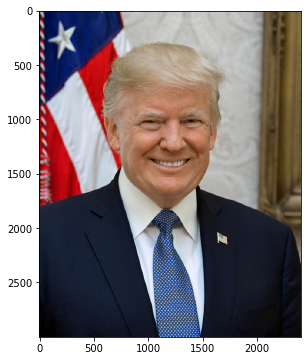

In [283]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6)) 
plt.imshow(image)

In [111]:
image

array([[[ 17,  34,  54],
        [ 22,  35,  54],
        [ 28,  34,  56],
        ...,
        [130, 114,  78],
        [131, 115,  79],
        [131, 115,  79]],

       [[ 15,  34,  51],
        [ 18,  35,  53],
        [ 27,  35,  54],
        ...,
        [130, 112,  76],
        [129, 113,  77],
        [132, 114,  78]],

       [[ 11,  38,  49],
        [ 14,  36,  49],
        [ 21,  37,  50],
        ...,
        [128, 108,  71],
        [129, 111,  73],
        [132, 112,  75]],

       ...,

       [[  3,   2,   7],
        [  3,   2,   7],
        [  3,   2,   8],
        ...,
        [ 14,  12,  17],
        [ 10,   9,  14],
        [ 11,  10,  15]],

       [[  3,   2,   7],
        [  3,   2,   7],
        [  3,   2,   8],
        ...,
        [ 17,  15,  20],
        [ 11,  10,  15],
        [ 10,  10,  12]],

       [[  4,   3,   8],
        [  4,   3,   8],
        [  3,   2,   8],
        ...,
        [ 17,  15,  20],
        [ 12,  11,  16],
        [ 10,  10,  12]]

In [112]:
import numpy as np

In [284]:
kernel = [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
kernel3d = []
for i in range(3):
  kernel3d.append(kernel)
kernel3d = np.array(kernel3d)

In [114]:
kernel3d

array([[[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]],

       [[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]],

       [[-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]]])

In [115]:
print(image.shape, kernel3d.shape)

(3000, 2405, 3) (3, 3, 3)


In [116]:
kernel = np.array(kernel)

In [312]:
# Defining Convolve2D
def convolve2D(image, kernel, p, s):
    kernel = np.flipud(np.fliplr(kernel))

    Kx = kernel.shape[0]
    Ky = kernel.shape[1]
    Ix = image.shape[0]
    Iy = image.shape[1]

    Ox = int(((Ix - Kx + 2 * p) / s) + 1)
    Oy = int(((Iy - Ky + 2 * p) / s) + 1)
    output = np.zeros((Ox, Oy))

    if (p != 0):
        imagePadded = np.zeros((image.shape[0] + p*2, image.shape[1] + p*2))
        imagePadded[int(p):int(-1 * p), int(p):int(-1 * p)] = image
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        if (y > image.shape[1] - Ky):
            break
        if (y % s == 0):
            for x in range(image.shape[0]):
                if (x > image.shape[0] - Kx):
                    break
                try:
                    if (x % s == 0):
                        output[x, y] = (kernel * imagePadded[x: x + Kx, y: y + Ky]).sum()
                except:
                    break
    return output

In [313]:
# Defining Convolve3D
def convolve3D(image3d, kernel3d, p=0, s=1):
  final = []
  for i in range(3):
    final.append(convolve2D(image3d[:,:,i], kernel3d[:,:,i], p, s))
    print("Channel "+str(i+1)+" done!")
  return final

In [164]:
# Serial - Image Convolution from Scratch
%%time
final = convolve3D(image, kernel3d)

Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 2min 1s, sys: 37.7 ms, total: 2min 1s
Wall time: 2min 1s


In [165]:
final = np.array(final)

In [166]:
final.shape

(3, 2998, 2403)

In [167]:
final = np.transpose(final, (1, 2, 0))

In [168]:
final.shape

(2998, 2403, 3)

In [169]:
final

array([[[ -173.,   636.,  -470.],
        [ -235.,   623.,  -486.],
        [ -321.,   708.,  -517.],
        ...,
        [-1156.,  1989.,  -666.],
        [-1159.,  2001.,  -676.],
        [-1172.,  2037.,  -686.]],

       [[ -151.,   654.,  -449.],
        [ -210.,   649.,  -468.],
        [ -304.,   769.,  -505.],
        ...,
        [-1153.,  1967.,  -646.],
        [-1150.,  1939.,  -648.],
        [-1164.,  2002.,  -661.]],

       [[ -146.,   703.,  -442.],
        [ -194.,   692.,  -459.],
        [ -288.,   843.,  -504.],
        ...,
        [-1145.,  1935.,  -621.],
        [-1142.,  1900.,  -617.],
        [-1157.,  1977.,  -636.]],

       ...,

       [[  -32.,    49.,   -71.],
        [  -32.,    58.,   -71.],
        [  -30.,    33.,   -69.],
        ...,
        [ -116.,   244.,  -151.],
        [ -105.,   183.,  -140.],
        [ -100.,   145.,  -134.]],

       [[  -29.,    43.,   -68.],
        [  -27.,    45.,   -66.],
        [  -24.,    21.,   -63.],
        .

In [170]:
final = np.uint8(final)
final

array([[[ 83, 124,  42],
        [ 21, 111,  26],
        [191, 196, 251],
        ...,
        [124, 197, 102],
        [121, 209,  92],
        [108, 245,  82]],

       [[105, 142,  63],
        [ 46, 137,  44],
        [208,   1,   7],
        ...,
        [127, 175, 122],
        [130, 147, 120],
        [116, 210, 107]],

       [[110, 191,  70],
        [ 62, 180,  53],
        [224,  75,   8],
        ...,
        [135, 143, 147],
        [138, 108, 151],
        [123, 185, 132]],

       ...,

       [[224,  49, 185],
        [224,  58, 185],
        [226,  33, 187],
        ...,
        [140, 244, 105],
        [151, 183, 116],
        [156, 145, 122]],

       [[227,  43, 188],
        [229,  45, 190],
        [232,  21, 193],
        ...,
        [125,   5,  94],
        [136, 226, 104],
        [149, 156, 118]],

       [[227,  43, 188],
        [231,  38, 192],
        [234,  14, 195],
        ...,
        [116,  25,  87],
        [125,   5,  94],
        [144, 168, 115]]

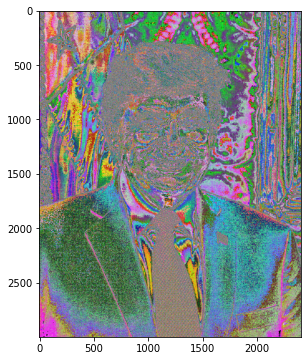

In [171]:
plt.figure(figsize=(6, 6)) 
plt.imshow(final)

In [276]:
s0 = image.shape[0]//2
print(s0)

1500


In [277]:
# Parallel - Image Convolution from Scratch
%%time
def worker1(image, kernel3d): 
  return convolve3D(image, kernel3d)

def worker2(image, kernel3d): 
  return convolve3D(image, kernel3d)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()

  final1 = worker1(image[:s0,:,:], kernel3d)
  final2 = worker2(image[s0:,:,:], kernel3d)

Process Process-49:
Process Process-50:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 2 required positional arguments: 'image' and 'kernel3d'
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 2 required positional arguments: 'image' and 'kernel3d'


Channel 1 done!
Channel 2 done!
Channel 3 done!
Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 2min 2s, sys: 114 ms, total: 2min 2s
Wall time: 2min 2s


In [278]:
final1 = np.array(final1)
final2 = np.array(final2)
final1 = np.transpose(final1, (1, 2, 0))
final2 = np.transpose(final2, (1, 2, 0))
final1 = np.uint8(final1)
final2 = np.uint8(final2)
print(final1.shape, final2.shape)

(1498, 2403, 3) (1498, 2403, 3)


In [279]:
final = np.concatenate((final1,final2),axis=0)

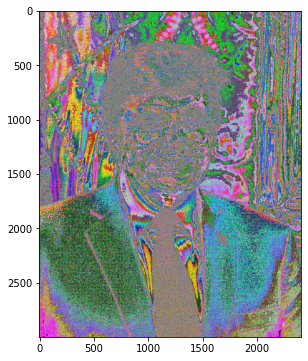

In [280]:
plt.figure(figsize=(6, 6)) 
plt.imshow(final)

In [293]:
from scipy import signal

In [294]:
image.shape

(3000, 2405, 3)

In [295]:
kernel3d.shape

(3, 3, 3)

In [297]:
def convolve3D_2(image3d, kernel3d, p=0, s=1):
  final = []
  for i in range(3):
    kernel3d[:,:,i] = np.rot90(kernel3d[:,:,i], 2)
    final.append(signal.convolve2d(image3d[:,:,i], kernel3d[:,:,i]))
    print("Channel "+str(i+1)+" done!")
  return final

In [300]:
# Serial - Using Inbuilt Convolve Function
%%time
final = convolve3D_2(image, kernel3d)
final = np.array(final)

Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 1.02 s, sys: 6 ms, total: 1.02 s
Wall time: 1.03 s


In [302]:
# Parallel - Using Inbuilt Convolve Function
%%time
def worker1(image): 
  return convolve3D_2(image, kernel3d)

def worker2(image): 
  return convolve3D_2(image, kernel3d)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join() 

  worker1(image[:image.shape[0]//2,:,:])
  worker2(image[image.shape[0]//2:,:,:])
  print("Done!") 

Process Process-53:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 1 required positional argument: 'image'
Process Process-54:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 1 required positional argument: 'image'


Channel 1 done!
Channel 2 done!
Channel 3 done!
Channel 1 done!
Channel 2 done!
Channel 3 done!
Done!
CPU times: user 1.01 s, sys: 72.1 ms, total: 1.08 s
Wall time: 1.21 s


In [310]:
kernel = [[-1, -1, -1], [-1, 8, -1], [-1, 8, -1], [-1, -1, -1]]
kernel3d = []
for i in range(4):
  kernel3d.append(kernel)
kernel3d = np.array(kernel3d)

In [311]:
kernel3d.shape

(4, 4, 3)

In [314]:
# Serial - Changing Filter Size
%%time
final = convolve3D(image, kernel3d)

Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 2min, sys: 31.6 ms, total: 2min 1s
Wall time: 2min 1s


In [315]:
# Parallel - Changing Filter Size
%%time
def worker1(image, kernel3d): 
  return convolve3D(image, kernel3d)

def worker2(image, kernel3d): 
  return convolve3D(image, kernel3d)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()

  final1 = worker1(image[:(image.shape[0])//2,:,:], kernel3d)
  final2 = worker2(image[(image.shape[0])//2:,:,:], kernel3d)

Process Process-55:
Process Process-56:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 2 required positional arguments: 'image' and 'kernel3d'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 2 required positional arguments: 'image' and 'kernel3d'


Channel 1 done!
Channel 2 done!
Channel 3 done!
Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 2min, sys: 90.5 ms, total: 2min
Wall time: 2min


In [318]:
l = image.shape[0]//4
l1, l2, l3 = l, 2*l, 3*l
print(l1, l2, l3)

750 1500 2250


In [319]:
# Parallel - Changing Number of Threads
%%time
def worker1(image, kernel3d): 
  return convolve3D(image, kernel3d)

def worker2(image, kernel3d): 
  return convolve3D(image, kernel3d)

def worker3(image, kernel3d): 
  return convolve3D(image, kernel3d)

def worker4(image, kernel3d): 
  return convolve3D(image, kernel3d)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)
  p3 = multiprocessing.Process(target=worker3) 
  p4 = multiprocessing.Process(target=worker4)

  # starting processes 
  p1.start() 
  p2.start()
  p3.start() 
  p4.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()
  p3.join() 
  p4.join()

  worker1(image[:l1,:,:], kernel3d)
  worker2(image[l1:l2,:,:], kernel3d)
  worker3(image[l2:l3,:,:], kernel3d)
  worker4(image[l3:,:,:], kernel3d)

Process Process-57:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 2 required positional arguments: 'image' and 'kernel3d'
Process Process-58:
Traceback (most recent call last):
Process Process-59:
Process Process-60:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
TypeError: worker2() missing 2 required positional arguments: 'image' and 'kernel3d'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.

Channel 1 done!
Channel 2 done!
Channel 3 done!
Channel 1 done!
Channel 2 done!
Channel 3 done!
Channel 1 done!
Channel 2 done!
Channel 3 done!
Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 2min 1s, sys: 187 ms, total: 2min 1s
Wall time: 2min 1s


In [320]:
# Scaling-up Image using Cubic Interpolation
img_scaled = cv2.resize(image,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)

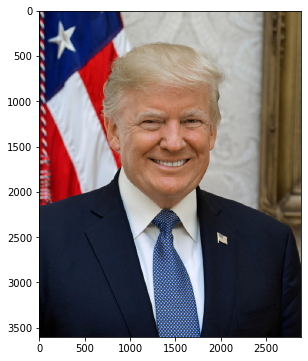

In [326]:
plt.figure(figsize=(6, 6)) 
plt.imshow(img_scaled)

In [328]:
# Serial - Scaling-up Image
%%time
final = convolve3D(img_scaled, kernel3d)
final = np.array(final)

Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 2min 57s, sys: 39.5 ms, total: 2min 57s
Wall time: 2min 57s


In [329]:
# Parallel - Scaling-up Image
%%time
def worker1(image, kernel3d): 
  return convolve3D(image, kernel3d)

def worker2(image, kernel3d): 
  return convolve3D(image, kernel3d)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()

  final1 = worker1(img_scaled[:(img_scaled.shape[0])//2,:,:], kernel3d)
  final2 = worker2(img_scaled[(img_scaled.shape[0])//2:,:,:], kernel3d)

Process Process-61:
Process Process-62:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
TypeError: worker1() missing 2 required positional arguments: 'image' and 'kernel3d'
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 2 required positional arguments: 'image' and 'kernel3d'


Channel 1 done!
Channel 2 done!
Channel 3 done!
Channel 1 done!
Channel 2 done!
Channel 3 done!
CPU times: user 2min 56s, sys: 151 ms, total: 2min 56s
Wall time: 2min 56s
